#Data Engineering: Class/Data Imbalance
Class imbalance is the circumstance where target classes in a dataset are not represented equally. A classic example is credit card fraud detection, where the target classes are fraud or not fraud. Datasets tend to have many 1000s of transactions but only a few cases of fraud. 

###Problem
Such imbalances complicate pattern learning because models tend to overfit, memorizing the training dataset and testing poorly on unseen transactions.

###Approaches
* Add more data
* Change performance metrics
* Change the algorithm
* Resampling
* Upsampling
* Downsampling
* Synthesizing samples (SMOTE)

###Datasets
* [Credit card fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud/home) as found at Kaggle

#Illustrating the Problem in Credit Card Fraud

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Load Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

How many samples of fraud are there? <br/>
A fraudulent transaction is marked '1' in the Class column.

In [ ]:
df['Class'].value_counts()
#1 is a case of fraud and 0 otherwise.

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#What is the proportion of fraud?
print("Proportion of fraud:", np.round(np.sum(df['Class']==1) / len(df['Class'])*100,2),'%')

Proportion of fraud: 0.17 %


Cases of fraud, in this dataset, comprise less than two 10ths of one percent.

In [ ]:
plt.style.use('dark_background')

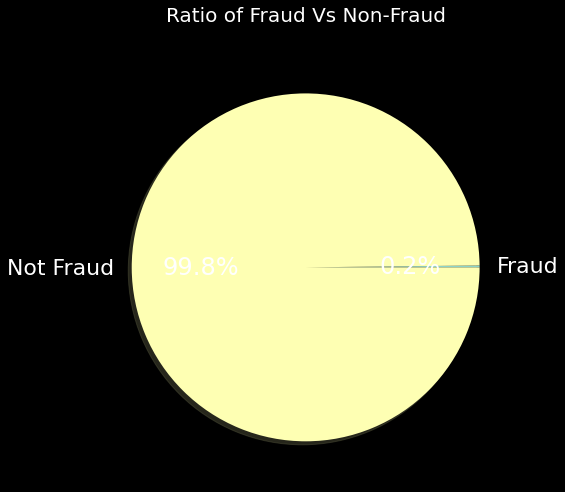

In [ ]:
fraud =len(df[df['Class']==1])
notfraud = len(df[df['Class']==0])

# Data
labels = 'Fraud','Not Fraud'
sizes = [fraud, notfraud]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Fraud Vs Non-Fraud\n', fontsize=20)
sns.set_context("paper", font_scale=2)

Let's try to build a model on the imbalance dataset and see our result.

In [ ]:
#Ensure the dataset has no null values.
pd.isnull(df).any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## Demonstration 1: Dummy Classifier

In [ ]:
# Separate input features and target
y1 = df['Class']
X1 = df.drop('Class', axis=1)

In [ ]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score,recall_score

In [ ]:
#Split dataset into X, y, train, and test.
# split the data into training and testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=50)

In [ ]:
#Instantiate the classifier
demo01 = DummyClassifier(strategy='most_frequent')

In [ ]:
#Train the model
demo01.fit(X1_train, y1_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
#Test model predictions
demo01_test = demo01.predict(X1_test)

In [ ]:
#Check unique labels
print('Unique predicted labels: ', (np.unique(demo01_test)))

#Checking accuracy
print('Accuracy :', accuracy_score(y1_test, demo01_test))
print('F1       :', f1_score(y1_test, demo01_test))
print('Precision:', precision_score(y1_test, demo01_test))
print('Recall   :', recall_score(y1_test, demo01_test))
print('Confusion:\n', confusion_matrix(y1_test, demo01_test))

Unique predicted labels:  [0]
Accuracy : 0.9984129659279234
F1       : 0.0
Precision: 0.0
Recall   : 0.0
Confusion:
 [[71089     0]
 [  113     0]]


In [ ]:
cm01 = confusion_matrix(y1_test, demo01_test)

In [ ]:
pd.DataFrame(cm01, columns=['Predicted OK', 'Predicted Fraud'], index=['Actual OK','Actual Fraud'])

,Predicted OK,Predicted Fraud
Actual OK,71089,0
Actual Fraud,113,0


Recall there were 1 is a case of fraud and 0 otherwise. Classification scores are proportional, so if one class is zero (0), resulting scores are zero (0) or undefined. <br/> Even though accuracy is 99%, no actual fraud was predicted fraud. So traditional metrics are meaningless. <br/> Instead of accuracy, a final revised model will use Area Under the Precision-Recall Curve (AUPRC).

##Demonstration 2: Logistic Regression

In [ ]:
#Import
from sklearn.linear_model import LogisticRegression

In [ ]:
#Instantiate
logistic = LogisticRegression(solver='liblinear')

In [ ]:
#Fit
logistic.fit(X1_train, y1_train)

LogisticRegression(solver='liblinear')

In [ ]:
#Predict on training set
logistic_pred = logistic.predict(X1_test)

In [ ]:
#Checking accuracy
accuracy_score(y1_test, logistic_pred)

0.9991432824920649

A model acheiving almost 100% is overfitting.

#Working with Imbalanced Data

## Add More Data

That is, collect more data. Until possible, move on to the next approach.

##Change Performance Metrics

Instead of accuracy, other metrics can be used to evaluate the model:
   
1. **Precision:** over all predicted positive, what percentage is actually positive (aka exactness). Higher scores minimize false positives.
   
2. **Recall:** over all actual positives, what percentage is predicted positive (aka completeness). Higher scores minimize false negatives.

3. **F1 Score (or F-score):** A weighted average of precision and recall. A tradeoff between minimizing either false positives or false negatives.

### Evaluations of Test Performance

**Confusion Matrix**

In [ ]:
pd.DataFrame(confusion_matrix(y1_test, logistic_pred), 
             columns=['Predicted OK','Predicted Fraud'],
             index=['Actually OK','Actually Fraud'])

,Predicted OK,Predicted Fraud
Actually OK,71064,25
Actually Fraud,36,77


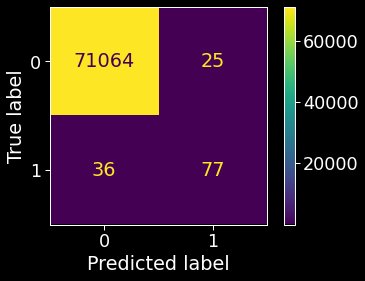

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic, X1_test, y1_test)  
plt.show() 

Notice the relatively balanced outcome of false negatives (36) and false positives (25). <br/>

In [ ]:
print('Recall   :',77/(36+77)) #Correct over all actual (true).
print('Precision:',77/(25+77)) #Correct over all predicted.
print('F1       :', f1_score(y1_test, logistic_pred))

Recall   : 0.6814159292035398
Precision: 0.7549019607843137
F1       : 0.7162790697674417


###Interpretation
* An F1 score this low is not good. It should be very close to 1.
* Both recall and precision should be closer to 100% or 1. 

As false negatives decrease, recall improves. As false positives decrease, precision improves.

##Change the Algorithm

Consider a **Random Forest** because ensembles usually perform better as against a single algorithm.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Initialisation
rfc = RandomForestClassifier()
rfc.fit(X1_train, y1_train)

RandomForestClassifier()

In [ ]:
#Predict on test set
rfc_pred = rfc.predict(X1_test)

In [ ]:
#Accuracy
accuracy_score(y1_test, rfc_pred)

0.999522485323446

In [ ]:
pd.DataFrame(confusion_matrix(y1_test, rfc_pred),
             columns=['Predicted OK','Predicted Fraud'],
             index=['Actually OK','Actually Fraud'])

,Predicted OK,Predicted Fraud
Actually OK,71082,7
Actually Fraud,27,86


In [ ]:
print('Recall   :', 86/(27+86)) #Correct over all actual (true).
print('Precision:', 86/(7+86)) #Correct over all predicted.
print('F1       :', f1_score(y1_test, rfc_pred))

Recall   : 0.7610619469026548
Precision: 0.9247311827956989
F1       : 0.8349514563106796


The ensemble performs better on every measure. 

##Resampling Techniques

We can change the dataset that we are using to build our predictive model to have more balanced data.

This approach is normally referred to as sampling the dataset. There are two main methods that are typically used.
1. **Upsampling/OverSampling**
2. **DownSampling/UnderSampling**

We will see how each of these techniques are used below.

###Upsampling/OverSampling
In upsampling or oversampling, we increase the number of samples in minority class to match up with the number of samples of the majority class. Implementation using sklearn.utils resample.

In [ ]:
# Import functionality
from sklearn.utils import resample

In [ ]:
# Separate minority and majority classes
not_fraud = df[df.Class==0]
fraud = df[df.Class==1]

In [ ]:
# Upsample minority
fraud_data_upsampled = resample(fraud, # ==87
                          replace = True, # sample with replacement
                          n_samples = len(not_fraud), # ==23235, # match number in majority class
                          random_state = 67) # reproducible results

In [ ]:
# Combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_data_upsampled])

In [ ]:
# Check new class counts
upsampled['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

###RandomOverSampler Method
[Documentation](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

In [ ]:
!pip install imbalanced-learn

In [ ]:
#Import Libraries
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#Instantiate
randOver = RandomOverSampler(random_state=50)

In [ ]:
#Fit
x_res, y_res = randOver.fit_resample(X1,y1)

In [ ]:
print('Original dataset shape {}'.format(Counter(y1)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


##Demonstration 2: Logistic regression on a balanced dataset

In [ ]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# Trying logistic regression with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

In [ ]:
demo03 = LogisticRegression(solver='liblinear')

In [ ]:
demo03.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
upsampled_pred = demo03.predict(X1_test)

In [ ]:
# Checking accuracy
accuracy_score(y1_test, upsampled_pred)

0.9732170444650431

In [ ]:
pd.DataFrame(confusion_matrix(y1_test, upsampled_pred),
             columns=['Predicted OK','Predicted Fraud'],
             index=['Actually OK','Actually Fraud']
             )

,Predicted OK,Predicted Fraud
Actually OK,69195,1894
Actually Fraud,13,100


In [ ]:
# Scores
print('Recall   :', 100/(13+100)) #Correct over all actual (true).
print('Precision:', 100/(1894+100)) #Correct over all predicted.
print('F1       :', f1_score(y1_test, upsampled_pred))

Recall   : 0.8849557522123894
Precision: 0.05015045135406219
F1       : 0.094921689606075


Recall is improved, but F1 and Precision dramatically worsened.

###DownSampling/UnderSampling

In undersampling, we decrease the number of samples in the majority class to match the number of samples of the minority class.

**Implementation Using Resample**

In [ ]:
# Separate classes fraud and not_fraud
not_fraud = df[df.Class==0]
fraud = df[df.Class==1]

# Downsample the majority class
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# Combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# Check counts
downsampled.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
# Try logistic regression again with the undersampled dataset
y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X1_test)

In [ ]:
accuracy_score(y1_test, undersampled_pred)

0.9760540434257464

In [ ]:
pd.DataFrame(confusion_matrix(y1_test, undersampled_pred),
              columns=['Predicted OK','Predicted Fraud'],
              index=['Actually OK','Actually Fraud'])

,Predicted OK,Predicted Fraud
Actually OK,69398,1691
Actually Fraud,14,99


In [ ]:
recall = recall_score(y1_test, undersampled_pred)
print('Recall is:',recall)

Recall is: 0.8761061946902655


In [ ]:
# Scores
print('Recall   :', 99/(99+14)) #Correct over all actual (true).
print('Precision:', 99/(1691+99)) #Correct over all predicted.
print('F1       :', f1_score(y1_test, undersampled_pred))

Recall   : 0.8761061946902655
Precision: 0.0553072625698324
F1       : 0.10404624277456646


Again, a good **Recall** means that the method reduced false negatives.

###Generate Synthetic Samples: SMOTE
SMOTE (Synthetic Minority Oversampling Technique) creates sythetic observations of the minority class using a nearest neighbors algorithm to generate feature values.

####Installations

In [ ]:
!pip install SMOTE

In [ ]:
!pip install imbalanced-learn

##Demonstration 3: Logistic Regression with SMOTE

In [ ]:
#Import libraries
from imblearn.over_sampling import SMOTE

In [ ]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# Setting up testing and training sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=27)

In [ ]:
sm = SMOTE(random_state=27)
X_train1, y_train1 = sm.fit_resample(X_train1, y_train1)

In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train1, y_train1)

smote_pred = smote.predict(X_test1)

# Checking accuracy
accuracy_score(y_test1, smote_pred)

0.9858571388444145

In [ ]:
pd.DataFrame(confusion_matrix(y_test1, smote_pred),
              columns=['Predicted OK','Predicted Fraud'],
              index=['Actually OK','Actually Fraud']
              )

,Predicted OK,Predicted Fraud
Actually OK,70081,989
Actually Fraud,18,114


In [ ]:
# Scores
print('Recall   :', 114/(114+18)) #Correct over all actual (true).
print('Precision:', 114/(989+114)) #Correct over all predicted.
print('F1       :', f1_score(y_test1, smote_pred))

Recall   : 0.8636363636363636
Precision: 0.10335448776065277
F1       : 0.18461538461538463


Not better than, but comparable to, over and undersampling.

##Demonstration 4: Random Forest on Balanced Dataset

In [ ]:
#Import Library
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randf = RandomForestClassifier(n_estimators=10).fit(X_train1, y_train1)

# Predict on test set
randf_pred = randf.predict(X_test1)

accuracy_score(y_test1, randf_pred)

0.9994803516755147

In [ ]:
pd.DataFrame(confusion_matrix(y_test1, randf_pred),
            columns=['Predicted OK','Predicted Fraud'],
            index=['Actually OK','Actually Fraud']
)

,Predicted OK,Predicted Fraud
Actually OK,71056,14
Actually Fraud,23,109


In [ ]:
# Scores
print('Recall   :', 109/(109+23)) #Correct over all actual (true).
print('Precision:', 109/(109+14)) #Correct over all predicted.
print('F1       :', f1_score(y_test1, randf_pred))

Recall   : 0.8257575757575758
Precision: 0.8861788617886179
F1       : 0.8549019607843139


Much better with all metrics considered, but still improvable.

Next steps are to test Random Forest with up- and downsampling.